In [101]:
## Dependancies ##

# Data 
import numpy as np
import pandas as pd

# Create Data
from sklearn.datasets import make_blobs


# Charting
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import graphviz 
import pydotplus


import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

import seaborn as sb

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Math
from statistics import mean

# Multi Linear Regresssion
from mpl_toolkits.mplot3d import Axes3D

# Lasso Model
from sklearn.linear_model import Lasso

# Ridge & Elastic Model
# Note: Use an alpha of .01 when creating the model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Decision Trees
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
## dataset
from sklearn.datasets import load_iris

# warnings
import warnings
warnings.simplefilter('ignore')



In [2]:
# to assign figure size for Matplotlib charts
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [3]:
# read csv data from Data_Cleaning_&_Consolidation_Annual_Reporting.ipynb
happiness_data = pd.read_csv('../resources/Complete_Happiness_Data.csv')

In [4]:
happiness_data.tail()

,COU,Country,Year,Avg. Work Hours (Annual),Avg. Wages (Annual),GDP (constant 2010 US$),Population density (people per sq. km of land area),Life Ladder,Log GDP per capita,Social support,...,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
226,LVA,Latvia,2012,1738.0,18272.87632,2.629302e+10,32.716613,5.125025,9.944049,0.851195,...,-0.040608,0.894979,0.560013,0.232225,0.191220,0.614571,0.721495,1.890645,0.368905,0.321799
227,LVA,Latvia,2013,1732.0,19151.96466,2.693190e+10,32.362872,5.069770,9.978767,0.834023,...,-0.075946,0.836554,0.642102,0.227449,0.233800,0.682029,0.757290,1.719731,0.339213,0.305940
228,LVA,Latvia,2014,1741.0,20429.45208,2.743236e+10,32.064683,5.729115,10.006597,0.881256,...,-0.046076,0.803688,0.652273,0.225979,0.229045,0.668352,0.854488,1.962900,0.342618,0.406468
229,LVA,Latvia,2016,1709.0,23591.68628,2.883070e+10,31.513943,5.940446,10.075054,0.917074,...,-0.159757,0.867640,0.653751,0.231384,0.315261,0.660759,0.869054,1.705120,0.287036,0.384025
230,LVA,Latvia,2017,1695.0,24633.97485,3.016743e+10,31.235896,5.977818,10.129182,0.895099,...,-0.158590,0.798378,0.623313,0.231753,0.264001,0.628388,0.881661,1.814803,0.303590,0.362185


In [5]:
#check types
happiness_data.dtypes

COU                                                          object
Country                                                      object
Year                                                          int64
Avg. Work Hours (Annual)                                    float64
Avg. Wages (Annual)                                         float64
GDP (constant 2010 US$)                                     float64
Population density (people per sq. km of land area)         float64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                 

In [6]:
# check for NaN values
happiness_data.count()

COU                                                         231
Country                                                     231
Year                                                        231
Avg. Work Hours (Annual)                                    231
Avg. Wages (Annual)                                         231
GDP (constant 2010 US$)                                     231
Population density (people per sq. km of land area)         231
Life Ladder                                                 231
Log GDP per capita                                          231
Social support                                              231
Healthy life expectancy at birth                            231
Freedom to make life choices                                231
Generosity                                                  231
Perceptions of corruption                                   231
Positive affect                                             231
Negative affect                         

In [7]:
#establish observed year list
years = list(happiness_data['Year'].unique())

In [8]:
happiness_data_1 = happiness_data.iloc[:,4:]
depedent_var = list(happiness_data_1.columns)

In [9]:
life_ladder = [depedent_var.index('Life Ladder')]
life_ladder

[3]

In [10]:
columns = list(happiness_data_1.columns)
columns

['Avg. Wages (Annual)',
 'GDP (constant 2010 US$)',
 'Population density (people per sq. km of land area)',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'gini of household income reported in Gallup, by wp5-year']

In [11]:
items_in_list = len(happiness_data_1.columns)

index_of_columns = [*range(0,items_in_list,1)]

In [12]:
index_of_columns.remove(3)

In [13]:
column_arrangement = life_ladder + index_of_columns

In [14]:
column_arrangement

[3, 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [15]:
# to rearrange columns 
column_order  = [columns[i] for i in column_arrangement]
column_order

['Life Ladder',
 'Avg. Wages (Annual)',
 'GDP (constant 2010 US$)',
 'Population density (people per sq. km of land area)',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'gini of household income reported in Gallup, by wp5-year']

In [16]:
happiness_data_1 = happiness_data_1[column_order]

### Data Analysis

Objective: To review correlation between the Life Ladder & Dependent Variables in the dataset

In [17]:
results = []

for year in years:
    
    # to make a dataframe per year
    annual_happiness_data = happiness_data.loc[happiness_data['Year'] == year].reset_index()
    
    yearly_data = annual_happiness_data.iloc[:,4:]
    
    corr_matrix = yearly_data.corr(method ='pearson')
    corr_matrix = corr_matrix[column_order]
    corr_matrix = corr_matrix.drop(columns=['Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year'])
    print(f"Completed year {year}")
    

    results.append(corr_matrix)

Completed year 2010
Completed year 2011
Completed year 2012
Completed year 2013
Completed year 2014
Completed year 2016
Completed year 2017


In [18]:
results[3]

,Life Ladder,Avg. Wages (Annual),GDP (constant 2010 US$),Population density (people per sq. km of land area),Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,"gini of household income reported in Gallup, by wp5-year"
Avg. Work Hours (Annual),-0.351770,-0.633037,0.047232,-0.215910,-0.703352,-0.646970,-0.076833,-0.562359,-0.366074,0.474857,-0.172443,0.485688,-0.532944,-0.734256,-0.670649,0.074241
Avg. Wages (Annual),0.695395,1.000000,0.312365,0.242660,0.928908,0.613728,0.178235,0.649153,0.650605,-0.672509,0.515375,-0.426342,0.640131,0.613056,0.782058,0.340105
GDP (constant 2010 US$),0.125108,0.312365,1.000000,0.044552,0.221957,0.095158,0.081371,0.022381,0.166148,0.046920,0.182325,-0.024883,-0.083790,-0.058061,0.052523,0.638913
Population density (people per sq. km of land area),0.090064,0.242660,0.044552,1.000000,0.208105,0.090920,0.198045,0.038576,0.003895,0.002359,0.003634,0.119713,0.197156,-0.078453,0.062597,-0.245257
Life Ladder,1.000000,0.695395,0.125108,0.090064,0.606104,0.517876,0.159234,0.724002,0.708992,-0.731761,0.659153,-0.538055,0.681317,0.369858,0.662075,0.341798
Log GDP per capita,0.606104,0.928908,0.221957,0.208105,1.000000,0.626338,0.148030,0.575541,0.535622,-0.666295,0.345439,-0.450423,0.693424,0.679169,0.785042,0.225297
Social support,0.517876,0.613728,0.095158,0.090920,0.626338,1.000000,0.106645,0.693850,0.582816,-0.433856,0.348891,-0.548597,0.392664,0.682809,0.706440,0.135031
Healthy life expectancy at birth,0.159234,0.178235,0.081371,0.198045,0.148030,0.106645,1.000000,0.100640,0.236672,-0.022550,0.153246,0.092526,-0.159392,-0.010634,0.138534,0.073982
Freedom to make life choices,0.724002,0.649153,0.022381,0.038576,0.575541,0.693850,0.100640,1.000000,0.687713,-0.707734,0.595853,-0.721348,0.598780,0.628732,0.804273,0.321321
Generosity,0.708992,0.650605,0.166148,0.003895,0.535622,0.582816,0.236672,0.687713,1.000000,-0.550184,0.640219,-0.355646,0.410410,0.418259,0.681066,0.532821


In [19]:
yearly_corr_table = [] 

i=0 # to iterate through years to provide detail to the table
 
# we are currently just interested in how the life ladder (happiness index) Correlates to the other values in the table
while i < len(years):
    for table in results:
        corr_table = table['Life Ladder'].to_frame() # to reshape data for matrix scatter plot.
        corr_table_rev_1 = corr_table.drop(index=['Life Ladder','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year'])

        # to rank the columns based on the average of the annual values
        corr_table_rev_1['Average Rank'] = corr_table_rev_1.rank(method='average',ascending=False)
#         corr_table_rev_1['Year'] = int(years[i])
        
        # to tranpose the final table to have rows equal to the year
        corr_table_rev_2 = corr_table_rev_1.T
        corr_table_rev_2['Year'] = int(years[i])
        
        
        # to append results of both the corr table & the analysis table to a list 
        yearly_corr_table.append(corr_table_rev_2) 

        # to concat the correlation table & the analysis into a df
        result = pd.concat(yearly_corr_table).round(3)
        
        print(f"Completed Concat of year {years[i]}")
        
        i += 1

result # print result of loop

Completed Concat of year 2010
Completed Concat of year 2011
Completed Concat of year 2012
Completed Concat of year 2013
Completed Concat of year 2014
Completed Concat of year 2016
Completed Concat of year 2017


,Avg. Work Hours (Annual),Avg. Wages (Annual),GDP (constant 2010 US$),Population density (people per sq. km of land area),Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,"gini of household income reported in Gallup, by wp5-year",Year
Life Ladder,-0.364,0.749,0.056,0.077,0.441,0.627,-0.424,0.730,0.647,-0.725,0.746,-0.377,0.735,0.463,0.644,0.165,2010
Average Rank,13.000,1.000,12.000,11.000,9.000,7.000,15.000,4.000,5.000,16.000,2.000,14.000,3.000,8.000,6.000,10.000,2010
Life Ladder,-0.429,0.783,0.085,0.110,0.643,0.587,0.010,0.729,0.716,-0.753,0.816,-0.422,0.685,0.440,0.726,0.303,2011
Average Rank,15.000,2.000,12.000,11.000,7.000,8.000,13.000,3.000,5.000,16.000,1.000,14.000,6.000,9.000,4.000,10.000,2011
Life Ladder,-0.396,0.709,0.074,0.044,0.630,0.478,0.496,0.786,0.678,-0.759,0.779,-0.578,0.748,0.441,0.702,0.197,2012
Average Rank,14.000,4.000,12.000,13.000,7.000,9.000,8.000,1.000,6.000,16.000,2.000,15.000,3.000,10.000,5.000,11.000,2012
Life Ladder,-0.352,0.695,0.125,0.090,0.606,0.518,0.159,0.724,0.709,-0.732,0.659,-0.538,0.681,0.370,0.662,0.342,2013
Average Rank,14.000,3.000,12.000,13.000,7.000,8.000,11.000,1.000,2.000,16.000,6.000,15.000,4.000,9.000,5.000,10.000,2013
Life Ladder,-0.420,0.700,0.103,0.047,0.587,0.549,0.430,0.695,0.750,-0.749,0.657,-0.517,0.735,0.416,0.722,0.281,2014
Average Rank,14.000,4.000,12.000,13.000,7.000,8.000,9.000,5.000,1.000,16.000,6.000,15.000,2.000,10.000,3.000,11.000,2014


In [20]:
annual_life_ladder_corr_table = result.loc[['Life Ladder']]
annual_avg_rank_table = result.loc[['Average Rank']]

In [21]:
annual_life_ladder_corr_table

,Avg. Work Hours (Annual),Avg. Wages (Annual),GDP (constant 2010 US$),Population density (people per sq. km of land area),Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,"gini of household income reported in Gallup, by wp5-year",Year
Life Ladder,-0.364,0.749,0.056,0.077,0.441,0.627,-0.424,0.730,0.647,-0.725,0.746,-0.377,0.735,0.463,0.644,0.165,2010
Life Ladder,-0.429,0.783,0.085,0.110,0.643,0.587,0.010,0.729,0.716,-0.753,0.816,-0.422,0.685,0.440,0.726,0.303,2011
Life Ladder,-0.396,0.709,0.074,0.044,0.630,0.478,0.496,0.786,0.678,-0.759,0.779,-0.578,0.748,0.441,0.702,0.197,2012
Life Ladder,-0.352,0.695,0.125,0.090,0.606,0.518,0.159,0.724,0.709,-0.732,0.659,-0.538,0.681,0.370,0.662,0.342,2013
Life Ladder,-0.420,0.700,0.103,0.047,0.587,0.549,0.430,0.695,0.750,-0.749,0.657,-0.517,0.735,0.416,0.722,0.281,2014
Life Ladder,-0.459,0.704,-0.000,0.068,0.626,0.475,0.431,0.724,0.786,-0.776,0.682,-0.557,0.703,0.465,0.721,0.294,2016
Life Ladder,-0.550,0.728,0.020,0.078,0.670,0.682,0.384,0.709,0.831,-0.789,0.660,-0.502,0.692,0.509,0.771,0.089,2017


In [22]:
avg_rank_per_col = annual_avg_rank_table.mean().round(1).sort_values()
avg_rank_per_col

Freedom to make life choices                                   2.9
Generosity                                                     3.0
Avg. Wages (Annual)                                            3.0
Delivery Quality                                               4.0
Confidence in national government                              4.0
Positive affect                                                4.4
Log GDP per capita                                             7.3
Social support                                                 7.7
Democratic Quality                                             9.1
gini of household income reported in Gallup, by wp5-year      10.6
Healthy life expectancy at birth                              10.9
Population density (people per sq. km of land area)           12.1
GDP (constant 2010 US$)                                       12.3
Avg. Work Hours (Annual)                                      14.1
Negative affect                                               

In [23]:
ordered_columns = list(avg_rank_per_col.index)
ordered_columns

['Freedom to make life choices',
 'Generosity',
 'Avg. Wages (Annual)',
 'Delivery Quality',
 'Confidence in national government',
 'Positive affect',
 'Log GDP per capita',
 'Social support',
 'Democratic Quality',
 'gini of household income reported in Gallup, by wp5-year',
 'Healthy life expectancy at birth',
 'Population density (people per sq. km of land area)',
 'GDP (constant 2010 US$)',
 'Avg. Work Hours (Annual)',
 'Negative affect',
 'Perceptions of corruption',
 'Year']

In [24]:
# rearranged columns for charting
annual_life_ladder_corr_table_rev1 = annual_life_ladder_corr_table[ordered_columns]
annual_avg_rank_table_rev1 = annual_avg_rank_table[ordered_columns]

In [25]:
# to assign the depedent variable columns to a list
dep_var_columns = list(annual_life_ladder_corr_table_rev1.iloc[:,:-1].columns)

In [26]:
# colors for the graph
colors = ['#f21f1f','#066378','#b8f227','#ed61e4','#5f9e11','#61edda','#9ca7ff','#666c6e','#f52c7c','#5f9e11','#543d82','#f5ed16','#a18f08','#ce1dd1','#cdd164','#ed6618']

In [27]:
len(colors)

16

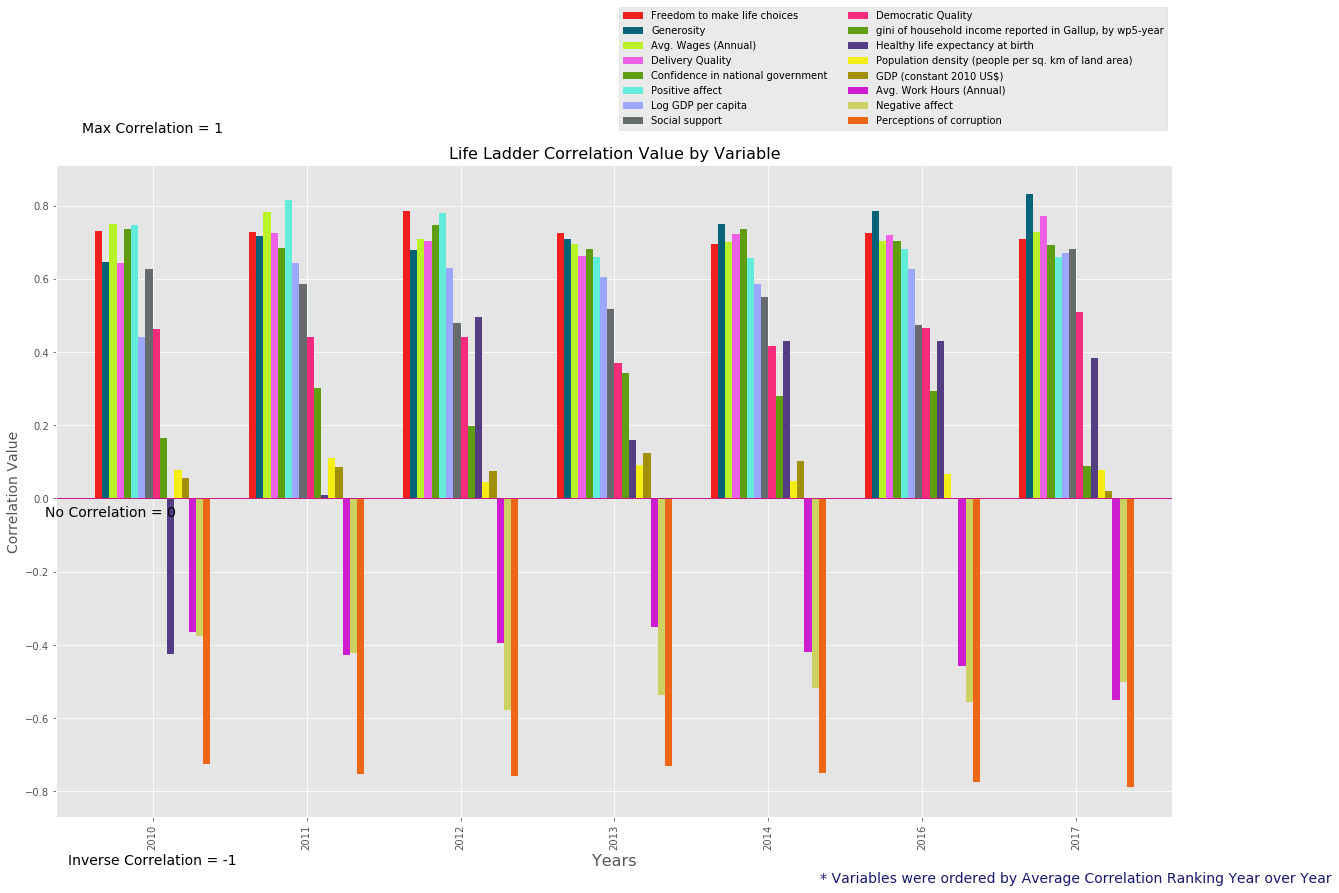

In [28]:
# to graph the variance in life ladder correlation values year over year
y = dep_var_columns
y_pos = np.arange(len(years))

#chart
ax = annual_life_ladder_corr_table_rev1.plot(x='Year', y=y, kind='bar', color=colors, width=.75)

#legend
ax.legend(bbox_to_anchor=(1, 1.25),loc='lower', ncol=2)

# to highlight no correlation
ax.axhline(y=0, color='mediumvioletred',linewidth=1)

# to insert comment
ax.text(0,1, 'Max Correlation = 1',ha='center', fontsize=14)
ax.text(0,-1, 'Inverse Correlation = -1', ha='center', fontsize=14)
ax.text(-.7,-.05, 'No Correlation = 0', fontsize=14)
ax.text(6,-1.05, '* Variables were ordered by Average Correlation Ranking Year over Year', ha='center', color='midnightblue', fontsize=14)


#axis labels
ax.set_xlabel('Years', fontsize = 16)
ax.set_ylabel('Correlation Value', fontsize=14)
ax.set_title(r'Life Ladder Correlation Value by Variable', fontsize=16);

plt.savefig('../charts/Life_Ladder_Correlation_Value.svg',format="svg",bbox_inches='tight')

#### Conclusion Summary
----------------------------------

The Life Ladder correlation between the dependent variables provides a high-level understanding of the variables' magnitude and volatility regarding 35 countries being reviewed. 

Variables that are suited for a linear regression model would depend on a variable's consistent linear magnitude; year over year. 

Thus, in the chart above, we are looking variables that hold a consistent correlation year over year for a multi-variant linear regression model. 

The magnitude of correlation is a factor, but it can be viewed that values that have low correlation have a higher rate of change year over year. 

Finally, those low and volatle variables would be interpreted as not applicable to our model. 

### <font color='orange'> Correlation Analysis </font>
-----------------------------------------------------------------------------


#### <font color = 'blue'> Step 1:  Spliting Variables into Categories </font>
--------------------------------------------------------

I would be interested in spliting the variables into categories such as economic, socio-political, and social factors. 

From there, I would like to make each category into a plot object of subplots.

Each structure will provide 2 insights:

1. If the categories have varying levels of linear properties or are properties consistent
2. If we can generalize the linear trends by reviewing slope or the qty / the types of minimas and maximas in a line to determine which variables would be appropriate for the model

#### <font color = 'green'> Additonal Notes </font>
----------------------------------

Now that we have compared correlation between Log GDP & GDP per Capita, we notice that Log GDP has a higher consistent correlation than GDP. 

Therefore, we will remove GDP (constant 2010 US$) from the options to avoid repetitive analysis. 

In [29]:
# to review list of columns
columns_to_analyze = list(annual_life_ladder_corr_table_rev1.columns)

In [30]:
columns_to_analyze

['Freedom to make life choices',
 'Generosity',
 'Avg. Wages (Annual)',
 'Delivery Quality',
 'Confidence in national government',
 'Positive affect',
 'Log GDP per capita',
 'Social support',
 'Democratic Quality',
 'gini of household income reported in Gallup, by wp5-year',
 'Healthy life expectancy at birth',
 'Population density (people per sq. km of land area)',
 'GDP (constant 2010 US$)',
 'Avg. Work Hours (Annual)',
 'Negative affect',
 'Perceptions of corruption',
 'Year']

In [31]:
# list of columns' indexes
# not including year yet so we can check for duplicates once completed with sublists

# index values
# economic : 2,6,9,13
# socio-political : 3,4,5,8,14,15
# social : 0,1,7,10,11

# lists
economic_cols = ['Avg. Wages (Annual)',
                 'Log GDP per capita',
                 'gini of household income reported in Gallup, by wp5-year',
                 'Avg. Work Hours (Annual)']


socio_political_cols = ['Delivery Quality',
                        'Confidence in national government',
                        'Positive affect',
                        'Positive affect',
                        'Negative affect',
                        'Perceptions of corruption']


social_cols = ['Freedom to make life choices','Generosity','Social support','Healthy life expectancy at birth','Population density (people per sq. km of land area)']

In [32]:
# to combine all the lists for comparison
created_list = economic_cols + socio_political_cols + social_cols
created_list

['Avg. Wages (Annual)',
 'Log GDP per capita',
 'gini of household income reported in Gallup, by wp5-year',
 'Avg. Work Hours (Annual)',
 'Delivery Quality',
 'Confidence in national government',
 'Positive affect',
 'Positive affect',
 'Negative affect',
 'Perceptions of corruption',
 'Freedom to make life choices',
 'Generosity',
 'Social support',
 'Healthy life expectancy at birth',
 'Population density (people per sq. km of land area)']

In [35]:
# to remove 'GDP (constant 2010 US$)' from list before analysis review
 ## We wanted to keep it before, so our index values above aligned with the original data table 
 ## - the second method of assessing the values is there as a proactive measure -  

columns_to_analyze.remove('GDP (constant 2010 US$)')
columns_to_analyze.remove('Year')

In [36]:
columns_to_analyze

['Freedom to make life choices',
 'Generosity',
 'Avg. Wages (Annual)',
 'Delivery Quality',
 'Confidence in national government',
 'Positive affect',
 'Log GDP per capita',
 'Social support',
 'Democratic Quality',
 'gini of household income reported in Gallup, by wp5-year',
 'Healthy life expectancy at birth',
 'Population density (people per sq. km of land area)',
 'Avg. Work Hours (Annual)',
 'Negative affect',
 'Perceptions of corruption']

In [37]:
# to test value Error in loop below
# created_list.append('Test') 

In [38]:
# If they have the same length & they 
length_comparison = len(created_list) - len(columns_to_analyze)
length_comparison

0

In [39]:
# to check for differences between list of indexes & created lists
list_differences = list(set(created_list) - set(columns_to_analyze))
list_differences

[]

In [40]:
# to check for differences between list of indexes & created lists
list_differences = list(set(created_list) - set(columns_to_analyze))

# to confirm that each list has all the indexes accounted for and that there are no duplicates
if not list_differences and \
    length_comparison == 0:
    print("There are no duplicates & no values missing")
else:
    print('Missing an Item')
    raise ValueError('list should be empty & may be duplicates')

There are no duplicates & no values missing


In [41]:
order_of_analysis = [economic_cols, socio_political_cols, social_cols]
order_of_analysis

[['Avg. Wages (Annual)',
  'Log GDP per capita',
  'gini of household income reported in Gallup, by wp5-year',
  'Avg. Work Hours (Annual)'],
 ['Delivery Quality',
  'Confidence in national government',
  'Positive affect',
  'Positive affect',
  'Negative affect',
  'Perceptions of corruption'],
 ['Freedom to make life choices',
  'Generosity',
  'Social support',
  'Healthy life expectancy at birth',
  'Population density (people per sq. km of land area)']]

In [42]:
## to also include the year in the final dataframe table 
 ## we are including the last column of the annual_life_ladder_corr_table_rev1, 'Year'. 
i = 0

while i < 3:
    order_of_analysis[i].append('Year')
    
    print(f'Completed list {i} of 2')
    
    i += 1

Completed list 0 of 2
Completed list 1 of 2
Completed list 2 of 2


In [43]:
# make dataframes from the indexed list for columns
economic_df = annual_life_ladder_corr_table_rev1.loc[:,order_of_analysis[0]]
social_political_df = annual_life_ladder_corr_table_rev1.loc[:,order_of_analysis[1]]
social_df = annual_life_ladder_corr_table_rev1.loc[:,order_of_analysis[2]]

In [44]:
economic_df = economic_df.rename(columns={'gini of household income reported in Gallup, by wp5-year': 'GINI index'})

In [45]:
economic_df

,Avg. Wages (Annual),Log GDP per capita,GINI index,Avg. Work Hours (Annual),Year
Life Ladder,0.749,0.441,0.165,-0.364,2010
Life Ladder,0.783,0.643,0.303,-0.429,2011
Life Ladder,0.709,0.630,0.197,-0.396,2012
Life Ladder,0.695,0.606,0.342,-0.352,2013
Life Ladder,0.700,0.587,0.281,-0.420,2014
Life Ladder,0.704,0.626,0.294,-0.459,2016
Life Ladder,0.728,0.670,0.089,-0.550,2017


#### <font color='darkblue'> Step 2: Plot Linear Regression Line & Review Variables Volatility</font>
-------------------------


In [46]:
economic_columns = list(economic_df.columns[:-1])
economic_columns

['Avg. Wages (Annual)',
 'Log GDP per capita',
 'GINI index',
 'Avg. Work Hours (Annual)']

In [48]:
dep_var_columns

['Freedom to make life choices',
 'Generosity',
 'Avg. Wages (Annual)',
 'Delivery Quality',
 'Confidence in national government',
 'Positive affect',
 'Log GDP per capita',
 'Social support',
 'Democratic Quality',
 'gini of household income reported in Gallup, by wp5-year',
 'Healthy life expectancy at birth',
 'Population density (people per sq. km of land area)',
 'GDP (constant 2010 US$)',
 'Avg. Work Hours (Annual)',
 'Negative affect',
 'Perceptions of corruption']

In [49]:
colors

['#f21f1f',
 '#066378',
 '#b8f227',
 '#ed61e4',
 '#5f9e11',
 '#61edda',
 '#9ca7ff',
 '#666c6e',
 '#f52c7c',
 '#5f9e11',
 '#543d82',
 '#f5ed16',
 '#a18f08',
 '#ce1dd1',
 '#cdd164',
 '#ed6618']

In [50]:
# to use consistent colors for variables across charts
colors_dict = {}

i = 0

while i < len(dep_var_columns):
    colors_dict.update({dep_var_columns[i]:colors[i]})
    
    print(f"Updated Color Dictionary to have variable with color: {dep_var_columns[i]}/{colors[i]}")
    
    i += 1

colors_dict

Updated Color Dictionary to have variable with color: Freedom to make life choices/#f21f1f
Updated Color Dictionary to have variable with color: Generosity/#066378
Updated Color Dictionary to have variable with color: Avg. Wages (Annual)/#b8f227
Updated Color Dictionary to have variable with color: Delivery Quality/#ed61e4
Updated Color Dictionary to have variable with color: Confidence in national government/#5f9e11
Updated Color Dictionary to have variable with color: Positive affect/#61edda
Updated Color Dictionary to have variable with color: Log GDP per capita/#9ca7ff
Updated Color Dictionary to have variable with color: Social support/#666c6e
Updated Color Dictionary to have variable with color: Democratic Quality/#f52c7c
Updated Color Dictionary to have variable with color: gini of household income reported in Gallup, by wp5-year/#5f9e11
Updated Color Dictionary to have variable with color: Healthy life expectancy at birth/#543d82
Updated Color Dictionary to have variable with c

{'Freedom to make life choices': '#f21f1f',
 'Generosity': '#066378',
 'Avg. Wages (Annual)': '#b8f227',
 'Delivery Quality': '#ed61e4',
 'Confidence in national government': '#5f9e11',
 'Positive affect': '#61edda',
 'Log GDP per capita': '#9ca7ff',
 'Social support': '#666c6e',
 'Democratic Quality': '#f52c7c',
 'gini of household income reported in Gallup, by wp5-year': '#5f9e11',
 'Healthy life expectancy at birth': '#543d82',
 'Population density (people per sq. km of land area)': '#f5ed16',
 'GDP (constant 2010 US$)': '#a18f08',
 'Avg. Work Hours (Annual)': '#ce1dd1',
 'Negative affect': '#cdd164',
 'Perceptions of corruption': '#ed6618'}

In [70]:
# to create a color pallet for economic variables that match master correlation chart
economic_colors = []
economic_index_values = [2,6,9,13]

for index in economic_index_values:
    economic_colors.append(colors[index])

economic_colors

['#b8f227', '#9ca7ff', '#5f9e11', '#ce1dd1']

In [47]:
X = list(economic_df['Year'].values)
y_avg = list(economic_df['Avg. Wages (Annual)'].values)
y_log_gdp = list(economic_df['Log GDP per capita'].values)
y_gini = list(economic_df['GINI index'].values)
y_hrs = list(economic_df['Avg. Work Hours (Annual)'].values)

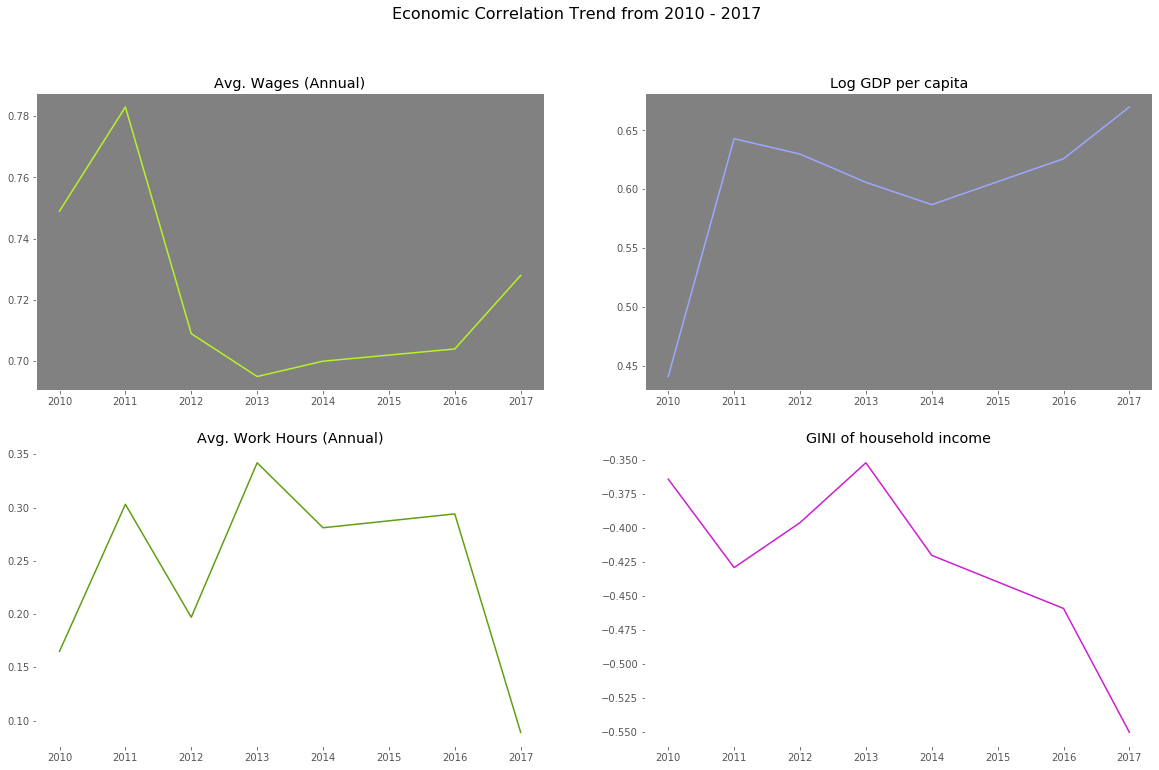

In [99]:
# to make a list of category attributes
y_values = [y_avg, y_log_gdp, y_gini, y_hrs]
set_face_colors = ['#828181','#828181','#ffffff','#ffffff']
set_titles_values = ['Avg. Wages (Annual)','Log GDP per capita','Avg. Work Hours (Annual)','GINI of household income']

# to plot a chart for all economic factors
fig = plt.figure()
fig.suptitle('Economic Correlation Trend from 2010 - 2017', fontsize=16)
fig.subplots_adjust(hspace=0.2)
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i)
    ax.plot(X, y_values[(i-1)], color= economic_colors[(i-1)])
    ax.grid(False)
    ax.set_facecolor(set_face_colors[(i-1)])
    ax.set_title(set_titles_values[(i-1)])

Regression Line Calculation

In [109]:
xs = economic_df['Year'].values
ys = economic_df['Avg. Wages (Annual)'].values

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(f'slope: {m}')
print(f'y-intercept {b}')


regression_line = [(m*x)+b for x in xs]

print(f'y-int regression points {regression_line}')

slope: 0.00014854176964895156
y-intercept 0.4249854176966605
y-int regression points [0.7235543746910531, 0.7237029164607021, 0.723851458230351, 0.724, 0.7241485417696489, 0.7244456253089469, 0.7245941670785958]


Next steps are to make the the calculation into a loop for all variables per category and then to make subplots per category and determine next steps for analysis



### Multi-Variant Linear Regression

y = mx + b with multiple mx variables